# Table of Contents

* [Summary Statistics](#chapter1)

* [Distributions](#chapter2)
    
* [Confidence Intervals](#chapter3)

* [OLS](#chapter4)
    
* [Hypothesis Testing](#chapter5)
    * [Example](#section_5_1)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
from tqdm import tqdm
import pandas as pd
from sklearn.datasets import fetch_california_housing
import statistics
import os

In [3]:
%matplotlib inline
plt.style.use('dark_background')

In [23]:
data_path = os.path.join('data', 'statistics')

# 1. Summary Stats<a class="anchor" id="chapter1"></a>

In [98]:
# mode, median, mean and variance

data = [0, 2, 2, 2, 1, 0, 4, 3]

data = pd.Series(data)

print(f'Mode:\t\t{round(statistics.mode(data), 3)}')
print(f'Median:\t\t{round(data.median(), 3)}')
print(f'Mean:\t\t{round(data.mean(), 3)}')
print(f'Variance:\t{round(data.std()**2, 3)}')

Mode:		2
Median:		2.0
Mean:		1.75
Variance:	1.929


In [20]:
# covariance and correlation

data = [
    (70,65), (80,85), (92,89)
]

data = pd.DataFrame(data)

print(f'Mean:\n{data.mean()}\n')
print(f'Covariance:\n{data.cov()}\n')
print(f'Correlation:\n{data.corr()}')

Mean:
0    80.666667
1    79.666667
dtype: float64

Covariance:
            0           1
0  121.333333  129.333333
1  129.333333  165.333333

Correlation:
          0         1
0  1.000000  0.913146
1  0.913146  1.000000


In [21]:
# descriptions

data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['price'] = data['target']

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 2. Distributions<a class="anchor" id="chapter2"></a>

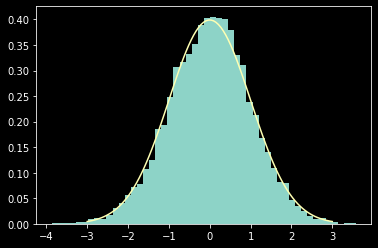

In [4]:
# Normal dist

mean = 0
sd = 1
samples = 10000

#samples
norm_samples = np.random.normal(mean, sd, samples)

#generate points for the pdf
x = np.linspace(-3*sd, 3*sd, 100)
y = ss.norm.pdf(x, mean, sd)

#plot histogram
fig, ax = plt.subplots()
ax.hist(norm_samples, density=True, bins=50)
ax.plot(x,y)

<class 'numpy.ndarray'>


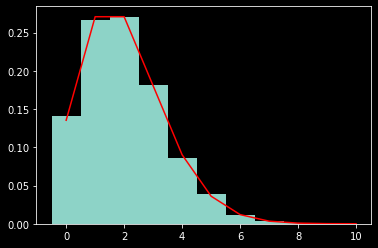

In [5]:
# Poisson

rate = 2
samples = 10000

# samples
pois_samples = np.random.poisson(rate, samples)
print(type(pois_samples))
# pdf points
x = np.linspace(0,10,11)
# can use x=np.arange(0,10,1) instead of linspace
y = ss.poisson.pmf(x,rate)

# plot hist
fig, ax = plt.subplots()
custom_bins = [-0.5+i for i in range(10)]
ax.hist(pois_samples, density=True, bins = custom_bins)
ax.plot(x,y, c='red', zorder=50)

100%|███████████████████████████████████████████████████████████████████| 10000/10000 [01:36<00:00, 103.15it/s]


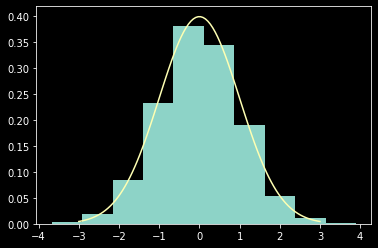

In [8]:
# Central Limit Theorem exercise

rate = 5
N = 50000

draws = np.ndarray((10000,))

for i in tqdm(range(10000)):
    pois_samples = np.random.poisson(rate, N)
    x_bar = np.mean(pois_samples)
    draws[i] = x_bar

x = np.linspace(-3, 3, 100)
y = ss.norm.pdf(x, 0, 1)

v = np.var(draws)
    
fig, ax = plt.subplots()
ax.hist((draws-rate)/v**0.5, density=True)
ax.plot(x,y)

# 3. Confidence Intervals<a class="anchor" id="chapter3"></a>

In [48]:
file_path = os.path.join(data_path, 'gender_cleaned_test_train.xlsx')

data = pd.read_excel(file_path, sheet_name='train')
data.shape

(8999, 7)

In [56]:
N = 100

mean = data['Height'].mean()
mu = data['Height'].sample(N).mean()
print(f"Population mean:\t{mean}")
print(f"Sample mean:\t\t{mu}")

Population mean:	168.62549585327918
Sample mean:		168.58693594991385


In [67]:
sample_std = data['Height'].std()
std_error = sample_std / (N ** 0.5)
conf_level = 0.95
alpha_div_two = (1 - conf_level) / 2
z_crit = ss.norm.ppf(conf_level + alpha_div_two)

lower = mu - (z_crit * std_error)
upper = mu + (z_crit * std_error)

area = round(
    statistics.NormalDist(mu, sigma=(sample_std ** 2) / N).cdf(upper) - 
    statistics.NormalDist(mu, sigma=(sample_std ** 2) / N).cdf(lower), 9
)

print(f'Std. Deviation:\t{sample_std}')
print(f'Std. Error:\t{std_error}\n')
print(f'Critical value:\t{round(z_crit, 3)}')

print(f'{conf_level*100}% CI:\t({round(lower, 3)}, {round(upper, 3)})')
print(f'Interval area:\t{area}')

Std. Deviation:	9.777062357643441
Std. Error:	0.9777062357643441

Critical value:	1.96
95.0% CI:	(166.671, 170.503)
Interval area:	0.955000089


In [41]:
# this is redefined later

def confidence_interval_sample_mean(data, conf_level=0.95):
    
    N = len(data)
    sample_mean = data.mean()
    sample_std = data.std()
    std_error = sample_std/(N ** 0.5)
    alpha_div_two = (1 - conf_level) / 2
    z_critical = ss.norm.ppf(conf_level + alpha_div_two)
    
    lower = sample_mean - (z_critical * std_error)
    upper = sample_mean + (z_critical * std_error)
    
    return (round(lower, 3), round(upper, 3))

confidence_interval_sample_mean(data['Height'].sample(N))

(166.793, 171.023)

In [68]:
file_path = os.path.join(data_path, 'coffee_experiment.csv')

data = pd.read_csv(file_path)
data.shape

(40, 2)

CI no coffee : (960.729, 1021.221)
CI coffee    : (968.843, 1156.307)


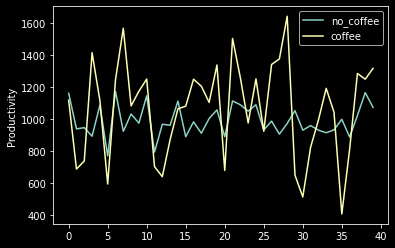

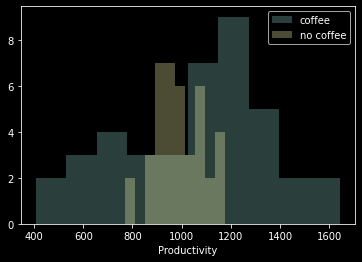

In [69]:
ax = data.plot()
ax.set_ylabel('Productivity')

fig, ax = plt.subplots()
ax.hist(data['coffee'], alpha=0.3, label = 'coffee')
ax.hist(data['no_coffee'], alpha=0.3, label = 'no coffee')
ax.set_xlabel('Productivity')
ax.legend()

print('CI no coffee :', confidence_interval_sample_mean(data['no_coffee']))
print('CI coffee    :', confidence_interval_sample_mean(data['coffee']))

# 4. OLS<a class="anchor" id="chapter4"></a>

In [70]:
file_path = os.path.join(data_path, 'gender_cleaned_test_train.xlsx')

data = pd.read_excel(file_path, sheet_name='train')
data.shape

(8999, 7)

In [78]:
string = '''
The summary reports the following for each coefficient:
- coefficient value
- standard error
- t-statistic (null hypothesis is the coefficient is zero)
- p-value (two sided test, null hypothesis is the coefficient is zero)
- 95% confidence interval

 

Model Checking metrics:
- Durbin Waton: Tests for autocorrelation. It is between 0 and 4.
  A statistic of 2 indicates no autocorrelation.
  A statistic substantially less than 2 indicates there is autocorrelation.
- Jarque-Beta: Tests whether residuals have the skewness and kurtosis matching
  that of a normal distribution.
  The null hypothesis is that the residuals have a skewness=0, and an excess
  kurtosis equal to 0.
- Omnibus: Tests for normality. Null hypothesis is that the residuals are normal.
- Condition Number: When the condition number is large (much larger than 1),
  then computing the inverse is difficult.
'''

print(string)


The summary reports the following for each coefficient:
- coefficient value
- standard error
- t-statistic (null hypothesis is the coefficient is zero)
- p-value (two sided test, null hypothesis is the coefficient is zero)
- 95% confidence interval

 

Model Checking metrics:
- Durbin Waton: Tests for autocorrelation. It is between 0 and 4.
  A statistic of 2 indicates no autocorrelation.
  A statistic substantially less than 2 indicates there is autocorrelation.
- Jarque-Beta: Tests whether residuals have the skewness and kurtosis matching
  that of a normal distribution.
  The null hypothesis is that the residuals have a skewness=0, and an excess
  kurtosis equal to 0.
- Omnibus: Tests for normality. Null hypothesis is that the residuals are normal.
- Condition Number: When the condition number is large (much larger than 1),
  then computing the inverse is difficult.



In [75]:
y = data['Height']
X = sm.add_constant(data[['IsMale','Weight']])

model = sm.OLS(y,X)
ols_results = model.fit()

ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 2.771e+04
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        20:57:24   Log-Likelihood:                -24428.
No. Observations:                8999   AIC:                         4.886e+04
Df Residuals:                    8996   BIC:                         4.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.4187      0.275    434.020      0.000     118.879     119.958
IsMale        -2.4149      0.127    -19.015      0.000      -2.664      -2.166
Weight         0.6872      0.004    157.461      0.000       0.679       0.696
==============================================================================
Omnibus:                        3.048   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                3.067
Skew:                          -0.044   Prob(JB):                        0.216
Kurtosis:                       2.984   Cond. No.                         564.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Hypothesis Testing<a class="anchor" id="chapter5"></a>

In [89]:
file_path = os.path.join(data_path, 'coffee_experiment.csv')

data = pd.read_csv(file_path)
data.shape

(40, 2)

In [ ]:
# university q claims mean is 25,000
# std dev of 10,000

# We do left tailed test
# H0: mu = 25000
# H1: mu < 25000 

In [82]:
N = len(data)
sample_mean = data['Salary'].mean()
sample_std = data['Salary'].std()
sample_se = sample_std / (N ** 0.5)

In [83]:
# t-statistic
mu = 25000
t = (sample_mean - mu) / sample_se

In [85]:
# one sided p-value
# this is the probability of seeing 
# a t-stat less than the sample mean assuming pop mean of 25000

p_value = ss.t(df=N-1).cdf(t)
print(f't statistic:\t', t)
print(f'p-value:\t', p_value)

t statistic:	 -2.043441334871025
p-value:	 0.023202452391853902


In [86]:
# two sided p-value - this is roughly double the one sided p-value
ttest = ss.ttest_1samp(data['Salary'], mu)
t = ttest[0]
p_value = ttest[1]
print(f't statistic:\t', t)
print(f'p-value:\t', p_value)

t statistic:	 -2.043441334871025
p-value:	 0.046404904783707804


## Example<a class="anchor" id="section_5_1"></a>

In [90]:
file_path = os.path.join(data_path, 'coffee_experiment.csv')

data = pd.read_csv(file_path)
data.shape

(40, 2)

In [87]:
def confidence_interval_sample_mean_norm(data, conf_level=0.95):
    
    N = len(data)
    sample_mean = data.mean()
    sample_std = data.std()
    
    std_error = sample_std/(N**0.5)
    
    alpha_div_two = (1-conf_level)/2
    z_critical = ss.norm.ppf(conf_level+alpha_div_two)
    
    lower = sample_mean - (z_critical*std_error)
    upper = sample_mean + (z_critical*std_error)
    
    return (lower, upper)

def confidence_interval_sample_mean_t(data, conf_level=0.95):
    
    N = len(data)
    sample_mean = data.mean()
    sample_std = data.std()
    
    std_error = sample_std/(N**0.5)
    
    alpha_div_two = (1-conf_level)/2
    t_critical = ss.t(df=N-1).ppf(conf_level+alpha_div_two)
    
    lower = sample_mean - (t_critical*std_error)
    upper = sample_mean + (t_critical*std_error)
    
    return (lower, upper)

In [92]:
corr = np.corrcoef(data['coffee'], data['no_coffee'])[0,1]
print('Correlation :', corr)

data.corr()

Correlation : 0.3686849359249213


,no_coffee,coffee
no_coffee,1.000000,0.368685
coffee,0.368685,1.000000


In [93]:
# there seems to be slight positive correlation but this is not particularly strong.
# this could be due to coffee having different effects on productivity for different people
# but these are the same people so the means will be correlated

# q2 95% confidence interval

data['diff'] = data['coffee'] - data['no_coffee']

conf_level = 0.95
alpha_div_two = (1 - conf_level) / 2

t_crit = ss.t(df = N - 1).ppf(conf_level + alpha_div_two)

x_bar1 = data['coffee'].mean()
x_bar2 = data['no_coffee'].mean()

x_diff = x_bar1 - x_bar2

lower = x_diff - t_crit * sample_se
upper = x_diff + t_crit * sample_se

print('95% confidence interval:', (lower, upper))

confidence_interval_sample_mean_norm(data['diff'])
confidence_interval_sample_mean_t(data['diff'])
# the normal intervals are slightly optimistic.

95% confidence interval: (-3187.4691865315667, 3330.6691865315665)


(-18.427861139134862, 161.62786113913484)

In [95]:
# q3 does the coffee make a difference?
# H0: diff = 0
# H1: diff != 0

# a3 not enough evidence to reject null hypothesis at a 95% level

# two tail test
ttest = ss.ttest_1samp(data['diff'], mu)
t = ttest.statistic
p_value = ttest.pvalue
print('t statistic:', t)
print('p-value:', p_value)

t statistic: -560.0760418617731
p-value: 8.845532397813573e-78


In [97]:
# q4 can we get the p_value manually?

N = len(data)
sample_mean = data['diff'].mean()
sample_std = data['diff'].std()
sample_se = sample_std / (N ** 0.5)

mu = 0
t = (sample_mean - mu) / sample_se

p_value = 2 * (1 - ss.t(df = N - 1).cdf(t)) 
# multiply by 2 bc 2 tailed
# 1-cdf bc cdf is probability of less or equal to

print('t statistic:', t)
print('p-value:', p_value)

# q5 what if diff was not iid
# a5 The test is not valid, standard errors will be wrong

t statistic: 1.6086650004534166
p-value: 0.11575600757448523
